## Практика по библиотекам numpy, scipy, pandas, matplotlib, seaborn, plotly, statsmodels, sklearn

### Среднее, медиана и мода

In [11]:
# Расчет с помощью scipy и numpy
import numpy as np
from scipy import stats
sample = np.array([185, 175, 170, 169, 171, 175, 157, 172, 170, 172, 167, 173, 168, 167, 166,
              167, 169, 172, 177, 178, 165, 161, 179, 159, 164, 178, 172, 170, 173, 171])
# В numpy кажись нет моды :(
print('mode:', stats.mode(sample)[0][0])
print('median:', np.median(sample))
print('mean:', np.mean(sample))

mode: 172
median: 170.5
mean: 170.4


In [14]:
# Расчет с помощью pandas
import pandas as pd
sample = pd.Series([185, 175, 170, 169, 171, 175, 157, 172, 170, 172, 167, 173, 168, 167, 166,
              167, 169, 172, 177, 178, 165, 161, 179, 159, 164, 178, 172, 170, 173, 171])
print('mode:', sample.mode())
print('median:', sample.median())
print('mean:', sample.mean())

mode: 0    172
dtype: int64
median: 170.5
mean: 170.4


In [23]:
sample = np.array([185, 175, 170, 169, 171, 175, 157, 172, 170, 172, 167, 173, 168, 167, 166,
              167, 169, 172, 177, 178, 165, 161, 179, 159, 164, 178, 172, 170, 173, 171])

### Меры изменчивости

In [24]:
print('Размах:', np.max(sample) - np.min(sample))
print('Стандартное отклонение:', np.std(sample))

Размах: 28
Стандартное отклонение: 5.902541825349482


### Диаграмма boxplot

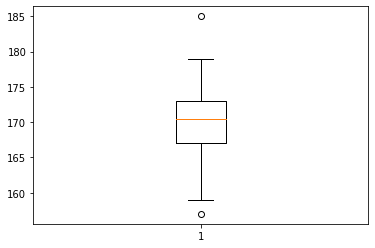

In [32]:
import matplotlib.pyplot as plt

plt.boxplot(sample)
plt.show()

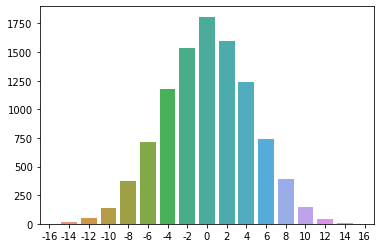

In [39]:
# Имитация доски Гальтона в коде
import seaborn as sns
data = dict()

# Кол-во шариков
N = 10000

# Кол-во уровней
level = 20

for _ in range(N):
    index = 0
    for _ in range(level):
        index += np.random.choice([-1, 1]) 
    data.setdefault(index, 0)
    data[index] += 1
sns.barplot(x = list(data.keys()), y = list(data.values()));

### Z-преобразование

In [44]:
M = 175
sd = 8
value = 186.2
z = (value - M)/sd
print(round(z, ndigits = 2))

1.4


In [48]:
# 95% Наблюдений будет в диапазоне
M = 100
D = 25
sd = np.sqrt(D)

print('[', M - 2*sd, ',', M + 2*sd, ']')

[ 90.0 , 110.0 ]


In [86]:
# Какой процент людей c IQ > 125
import scipy as sp

M = 100
sd = 15
value = 125

sp.stats.norm.sf((value - M)/sd)

0.0477903522728147

In [74]:
# Какой приблизительно процент людей обладает IQ на 
# промежутке от 70 до 112

M = 100
sd = 15
value1 = 70
value2 = 112

p_value_left = sp.stats.norm.cdf((value1-M)/sd)
p_value_right = sp.stats.norm.sf((value2-M)/sd)
print(round(1 - p_value_left - p_value_right, ndigits = 2))

0.77


In [76]:
# Рассчитать стандартную ошибку

D = 4
N = 100

se = np.sqrt(D)/np.sqrt(N)
print(se)

0.2


In [83]:
# Рассчитать 99% доверительный интервал
x = 10
sd = 5
n = 100

print('[', x - 2.58 * (sd/np.sqrt(n)), ',', x + 2.58 * (sd/np.sqrt(n)) ,']')

[ 8.71 , 11.29 ]


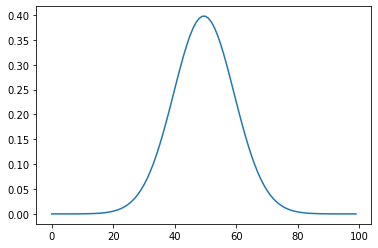

In [103]:
# T-распределение
x = np.linspace(-5, 5, 100)
y = sp.stats.t.pdf(x, df = 100)

plt.plot(y);

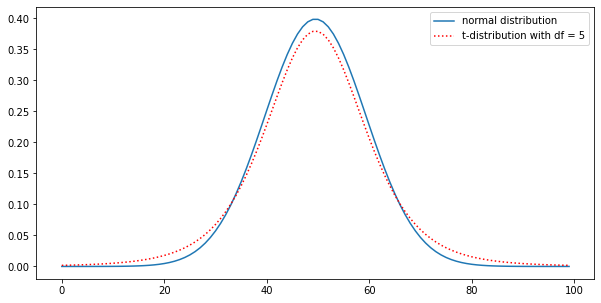

In [126]:
# Нормальное распределение
x = np.linspace(-5, 5, 100)
y1 = sp.stats.norm.pdf(x)
y2 = sp.stats.t.pdf(x, df = 5)
plt.figure(figsize=(10, 5))
plt.plot(y1)
plt.plot(y2, 'r:')
plt.legend(['normal distribution', 't-distribution with df = 5'], loc = 'upper right')
plt.show()

In [132]:
# Рассчитать p-уровень значимости (двусторонний)
mean = 10
t = -2
n = 15
round(sp.stats.t.cdf(t, df = n-1) * 2, ndigits = 3)

0.065

### T-критерий Стьюдента

In [28]:
import numpy as np
import pandas as pd
array1 = np.array([84.7, 105, 98.9, 97.9, 108.7, 81.3, 99.4, 89.4 , 93, 119.3, 99.2, 99.4, 97.1, 112.4, 99.8, 94.7, 114, 95.1, 115.5, 111.5])
array2 = np.array([57.2, 68.6, 104.4, 95.1, 89.9, 70.8, 83.5, 60.1, 75.7, 102, 69, 79.6, 68.9, 98.6, 76, 74.8, 56, 55.6, 69.4, 59.5])

# Считаем количество элементов, среднее, стандартное отклонение и стандартную ошибку
dtfm = pd.DataFrame({'1-ая выборка':array1, '2-ая выборка':array2}).agg(['mean', 'std', 'count', 'sem']).T
dtfm.columns = ['Mx', 'SD', 'N', 'SE']

print(dtfm)

# Выясним являются ли значения статистически значимыми
df = len(array1) - 1

sd1 = dtfm.loc['1-ая выборка']['SD']
n1 = dtfm.loc['1-ая выборка']['N']

sd2 = dtfm.loc['2-ая выборка']['SD']
n2 = dtfm.loc['2-ая выборка']['N']

se = np.sqrt((sd1 ** 2 / n1) + (sd2 ** 2 / n2))

se1 = dtfm.loc['1-ая выборка']['SE']
se2 = dtfm.loc['2-ая выборка']['SE']

mean1 = array1.mean()
mean2 = array2.mean()
t = (mean1 - mean2) / se
p_value = 2*(1 - sp.stats.t.cdf(t, df))

print('p-value:', p_value)

# В одну строчку тоже самое
print('p-value in one line:', sp.stats.ttest_ind(array1, array2, alternative='two-sided')[1])

if p_value < 0.05:
    print('Отклоняем нулевую гипотезу H0 о равенстве средних значений данных выборок')
else:
    print('Верна нулевая гипотеза H0 о равенстве средних значений данных выборок')
    
# 95% интервал отклонения среднего
# Возвращается кортеж
interval1 = sp.stats.t.interval(0.95, df = df, loc = mean1, scale = se1)
interval2 = sp.stats.t.interval(0.95, df = df, loc = mean2, scale = se2)

# Округляем значения
interval_arr1 = np.around(np.array(interval1), decimals = 2)
interval_arr2 = np.around(np.array(interval2), decimals = 2)

d = {'1-ая выборка':interval_arr1, '2-ая выборка':interval_arr2}
dtfm['interval'] = pd.Series(data = d)

dtfm

                   Mx         SD     N        SE
1-ая выборка  100.815  10.246503  20.0  2.291188
2-ая выборка   75.735  15.458102  20.0  3.456537
p-value: 8.113664646369756e-06
p-value in one line: 4.894702897415829e-07
Отклоняем нулевую гипотезу H0 о равенстве средних значений данных выборок


,Mx,SD,N,SE,interval
1-ая выборка,100.815,10.246503,20.0,2.291188,"[96.02, 105.61]"
2-ая выборка,75.735,15.458102,20.0,3.456537,"[68.5, 82.97]"


In [238]:
array3 = np.array([101, 101, 107, 112, 108, 103, 101, 113, 103, 118, 103, 117, 119, 104, 114, 113, 106, 104, 110, 104])
array4 = np.array([116, 102, 109, 109, 119, 116, 115, 116, 105, 103, 111, 102, 114, 106, 105, 107, 113, 114, 107, 109])

dtfm = pd.DataFrame({'1-ая выборка':array3, '2-ая выборка':array4}).agg(['mean', 'std', 'count', 'sem']).T
dtfm.columns = ['Mx', 'SD', 'N', 'SE']

df = len(array3) - 1
print(dtfm)

sd1 = dtfm.loc['1-ая выборка']['SD']
n1 = dtfm.loc['1-ая выборка']['N']

sd2 = dtfm.loc['2-ая выборка']['SD']
n2 = dtfm.loc['2-ая выборка']['N']

se = np.sqrt((sd1 ** 2 / n1) + (sd2 ** 2 / n2))

mean1 = array4.mean()
mean2 = array3.mean()

t = (mean1 - mean2) / se

p_value = 2*(1 - sp.stats.t.cdf(t, df))
print('p-value:', p_value)

# В одну строчку тоже самое
print('p-value in one line:', sp.stats.ttest_ind(array3, array4, alternative='two-sided')[1])

if p_value < 0.05:
    print('Отклоняем нулевую гипотезу H0 о равенстве средних значений данных выборок')
else:
    print('Верна нулевая гипотеза H0 о равенстве средних значений данных выборок')

                  Mx        SD     N        SE
1-ая выборка  108.05  5.995393  20.0  1.340611
2-ая выборка  109.90  5.230477  20.0  1.169570
p-value: 0.3114564636004076
p-value in one line: 0.3049752508036721
Верна нулевая гипотеза H0 о равенстве средних значений данных выборок


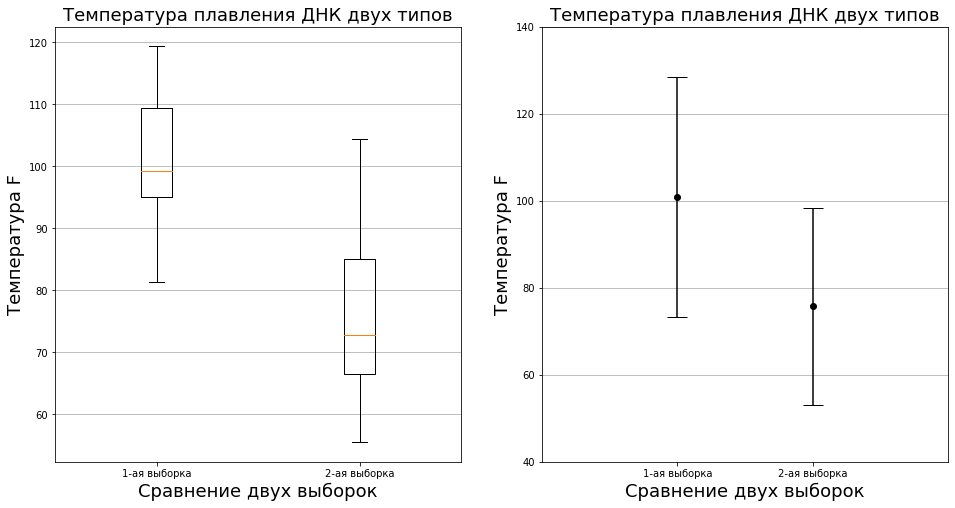

In [376]:
# Строим окна для графиков
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (16, 8))

# Boxplot
plot1 = ax1.boxplot([array1, array2], labels = ['1-ая выборка', '2-ая выборка'])

# Доверительные интервалы
plt.xlim(-1, 2)
plt.ylim(40, 140)
plot2 = ax2.errorbar(x = dtfm.index, y = dtfm['Mx'], yerr = dtfm['interval'][1] - dtfm['interval'][0], color = 'black', capsize=10, fmt = 'o')

for ax in [ax1, ax2]:
    ax.yaxis.grid(True)
    ax.set_title('Температура плавления ДНК двух типов', fontsize = 18)
    ax.set_xlabel('Сравнение двух выборок', fontsize = 18)
    ax.set_ylabel('Температура F', fontsize = 18)

Рассчитать доверительный интервал для t-распределения
$$ \bar{X}=89,9\quad sd=11,3\quad n=20$$

In [27]:
import scipy as sp
from scipy import stats
x = 89.9
sd = 11.3
n = 20

# 95 % процентный доверительный интервал
p = 0.95

se = sd/np.sqrt(n)

stats.t.interval(0.95, df = n-1, scale = se, loc = x)

(84.61143720745503, 95.18856279254499)

Первые премии Оскар за лучшую мужскую и женскую роль были вручены в 1929. Данные гистограммы демонстрируют распределение возраста победителей с 1929 по 2014 год (100 мужчин, 100 женщин). Используя t - критерий проверьте, можно ли считать наблюдаемые различия в возрасте между лучшими актрисами и актерами  статистически достоверными.

Средний возраст мужчин равен 45, sd = 9.

Средний возраст женщин равен 34, sd = 10.

<img src = 'img/plot1.png'>

In [35]:
mean1, mean2 = 45, 34
sd1, sd2 = 9, 10
n1, n2 = 100, 100

se = np.sqrt((sd1 ** 2 / n1) + (sd2 ** 2 / n2))

t_value = (mean1 - mean2) / se

p_value = 2*sp.stats.t.sf(t_value, n1+n2 - 2)
print('p-value:', p_value)
if p_value < 0.05:
    print('Отклоняем нулевую гипотезу H0 о равенстве средних значений данных выборок')
else:
    print('Верна нулевая гипотеза H0 о равенстве средних значений данных выборок')

p-value: 3.455544014290269e-14
Отклоняем нулевую гипотезу H0 о равенстве средних значений данных выборок


### QQ-plot

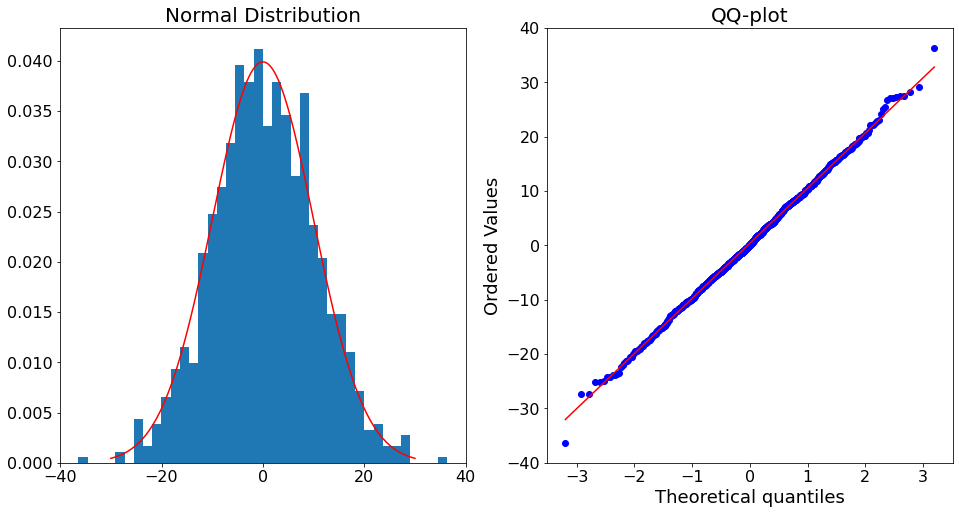

In [122]:
import numpy as np
import matplotlib.pyplot as plt
mu = 0
sigma = 10
n = 1000

sequence = np.random.normal(mu, sigma, n)

# normal distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 8))

#fig.suptitle('Normal Distribution and QQ-plot', fontsize = 24)

x = np.linspace(mu - 3*sigma, mu + 3*sigma, 1000)
plot1 = ax1.hist(sequence, 40, density = True)

ax1.plot(x, stats.norm.pdf(x, mu, sigma), color='r')

ax1.set_title('Normal Distribution', fontsize = 20)

# QQ-plot
stats.probplot(sequence, dist = 'norm', plot = ax2)

ax2.set_title('QQ-plot', fontsize = 20)

ax2.set_xlabel('Theoretical quantiles', fontsize = 18)
ax2.set_ylabel('Ordered Values', fontsize = 18)

for ax in [ax1, ax2]:
    ax.tick_params(axis='both', labelsize=16)

### Однофакторный дисперсионный анализ

$$ SS_{total} = \sum_{j=1}^{p}{\sum_{i=1}^{n_j}{(x_{ij} - \bar{x})^2}} = SS_{between} + SS_{within} $$
$$ SS_{between} = \sum_{j=1}^{p}{n_j{(\bar{x}_j - \bar{x})^2}} $$
$$ SS_{within} = \sum_{j=1}^{p}{\sum_{i=1}^{n_j}{(x_{ij} - \bar{x}_j)^2}} $$

Нулевая гипотеза: a=b=c
Альтернативная гипотеза: !(a=b=c)
p-value: 0.008
Отклоняем нулевую гипотезу H0 о равенстве средних значений данных выборок


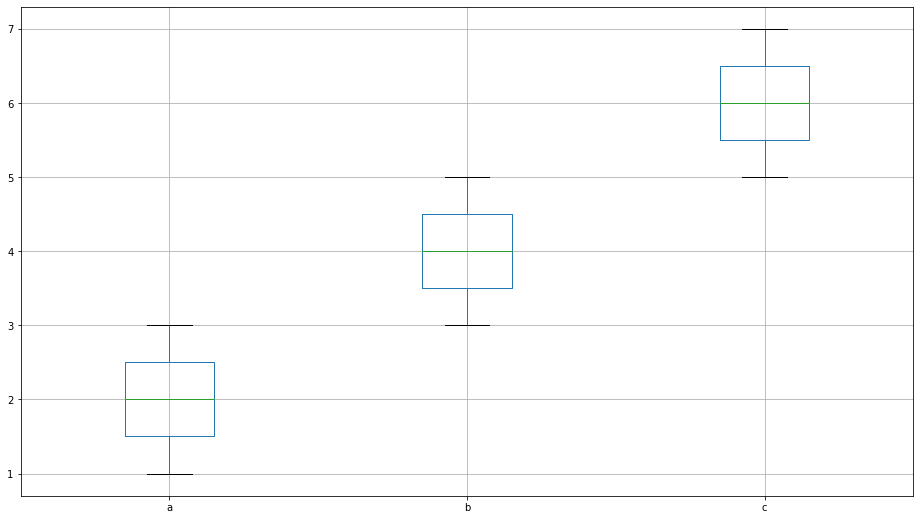

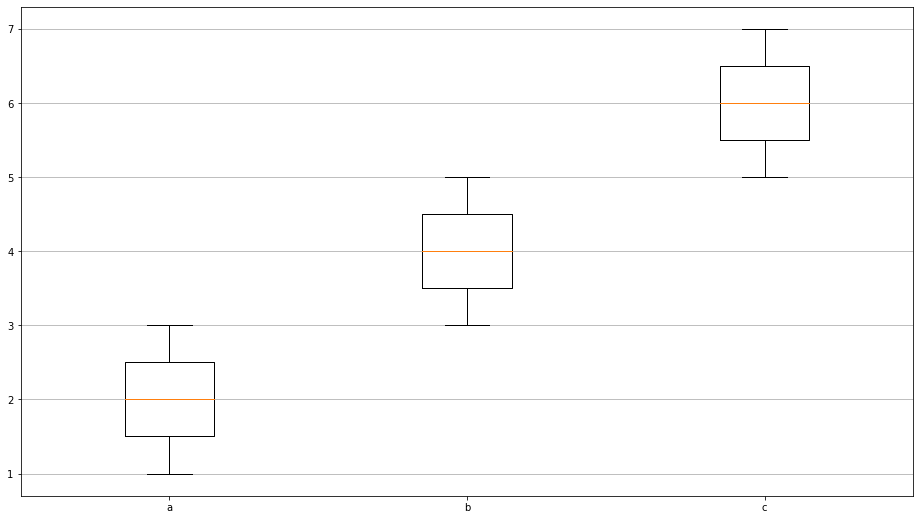

In [461]:
data = pd.DataFrame({"a": [3, 1, 2], "b": [5, 3, 4], "c": [7, 6, 5]})
data.boxplot(figsize=(16, 9))

print("Нулевая гипотеза:", "=".join(data))
print("Альтернативная гипотеза:", f'!({"=".join(data)})')

general_mean = data.values.flatten().mean()

fig, ax = plt.subplots(1, 1, figsize=(16, 9))
plt.boxplot(data, labels=["a", "b", "c"])
ax.yaxis.grid(True)

# внутригрупповая сумма квадратов 
ssw = np.sum(
    np.sum(
        pd.Series(
            map(
                lambda x: pd.Series(map(lambda y: (y - x[1]) ** 2, data[x[0]])),
                data.mean().items(),
            )
        )
    )
)

# межгрупповая сумма квадратов
ssb = np.sum(
    pd.Series(
        map(
            lambda x: data[x[0]].shape[0] * (x[1] - general_mean) ** 2,
            data.mean().items(),
        )
    )
)

count_of_groups = data.shape[1]

# число степеней свободы для межгрупповой суммы квадратов
dfb = count_of_groups - 1

# число степеней свободы для внутригрупповой суммы квадратов
dfw = data.size - count_of_groups

# межгрупповой средний квадрат
mssb = ssb / dfb

# внутригрупповой средний квадрат
mssw = ssw / dfw

f_value = mssb / mssw

p_value = stats.f.sf(f_value, dfb, dfw)
print('p-value:', round(p_value, ndigits = 3))

if p_value < 0.05:
    print('Отклоняем нулевую гипотезу H0 о равенстве средних значений данных выборок')
else:
    print('Верна нулевая гипотеза H0 о равенстве средних значений данных выборок')

### Множественные сравнения в ANOVA

#### T-критерий без поправок на множественную проверку гипотез

In [148]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
from scipy.stats import t

# Парный t-критерий возвращает True, если средние всех выборок равны
def pair_t(samples, alpha):
    n_samples = samples.shape[0]
    n_combinations = n_samples*(n_samples - 1) / 2
    result = np.zeros(n_combinations, dtype = bool)
    k = 0
    for i in range(n_samples):
        for j in range(i + 1, n_samples):
            N = samples[i].size
            se = np.sqrt((samples[i].std()**2)/N + (samples[j].std()**2)/N)
            t_value = (samples[i].mean() - samples[j].mean())/se
            p_value = t.sf(t_value, N-2)
            result[k] = p_value >= alpha
            k += 1
    return np.all(result)

In [81]:
# Возвращает количество ложных результатов при парном сравнении с помощью t-критерия
# alpha = 1 - p_value
def pair_t_test(repeats, n_samples, sample_size, ax, alpha = 0.05):
    result = np.zeros(repeats, dtype = bool)
    for i in range(repeats):
        samples = random.randn(n_samples, sample_size)
        result[i] = pair_t(samples, alpha)
        
    unique, counts = np.unique(result, return_counts = True)
    percentage = counts/result.size
    explode = (0.1, 0.1)
    ax.pie(percentage, explode = explode, labels = unique, autopct='%.0f%%', colors = ['#D62728', '#2CA02C'], shadow=True, startangle=90)

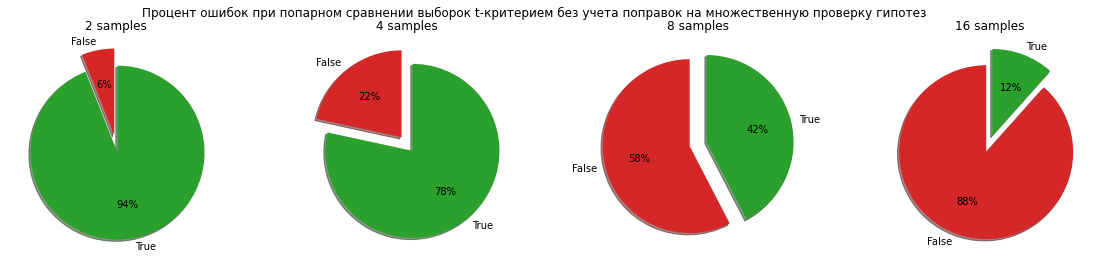

In [85]:
fig, axs = plt.subplots(ncols = 4, figsize = (20, 4))
n_samples = [2, 4, 8, 16]
fig.suptitle('Процент ошибок при попарном сравнении выборок t-критерием без учета поправок на множественную проверку гипотез')

for n, ax in zip(n_samples, axs):
    pair_t_test(250, n, 100, ax)
    ax.set_title(f'{n} samples')

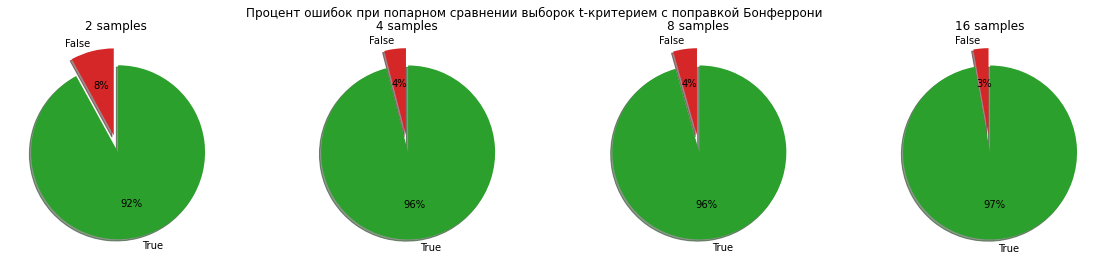

In [86]:
fig, axs = plt.subplots(ncols=4, figsize=(20, 4))
n_samples = [2, 4, 8, 16]
fig.suptitle('Процент ошибок при попарном сравнении выборок t-критерием с поправкой Бонферрони')

for n, ax in zip(n_samples, axs):
    alpha = 0.05/((n*(n-1))/2)
    pair_t_test(250, n, 100, ax, alpha)
    ax.set_title(f'{n} samples')
    
# Поправка Бонферонни слишком консервативная и её за это критикуют. 
# На её замену используют Критерий Тьюки

#### Ошибки первого и второго рода

<img src='img/errors.jpg'>

### Корреляция

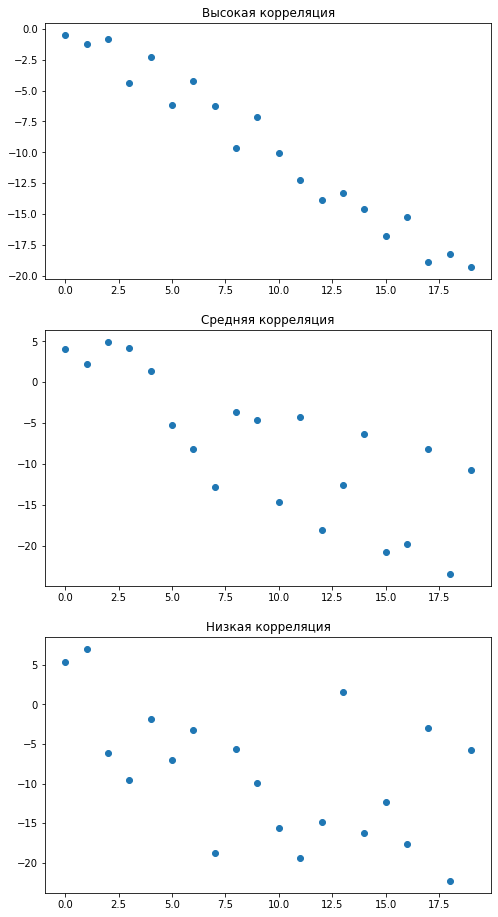


cov1: -36.97
cov2: -40.85
cov3: -25.26

cor1: -0.98
cor2: -0.79
cor3: -0.51



In [59]:
import random as r
import matplotlib.pyplot as plt

def cov(x, y):
    return ((x - x.mean()) * (y - y.mean())).sum()/(x.size - 1)

def cor(x, y):
    return cov(x, y)/(np.std(x, ddof = 1)*np.std(y, ddof = 1))

# p - показатель случайности фактора
def randomize(arr, p):
    alpha = np.max(arr) - np.min(arr)
    res = np.zeros(arr.shape)
    for i, value in enumerate(arr):
        sign = 1 if r.choice([True, False]) else -1
        res[i] = sign*alpha*r.random()*p - value
    return res

x = np.array(range(20))
y1 = randomize(x, 0.1)
y2 = randomize(x, 0.5)
y3 = randomize(x, 0.9)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize = (8, 16))
ax1.scatter(x, y1)
ax2.scatter(x, y2)
ax3.scatter(x, y3)

ax1.set_title('Высокая корреляция')
ax2.set_title('Средняя корреляция')
ax3.set_title('Низкая корреляция')

plt.show()

print(f'''
cov1: {cov(x, y1):.2f}
cov2: {cov(x, y2):.2f}
cov3: {cov(x, y3):.2f}

cor1: {cor(x, y1):.2f}
cor2: {cor(x, y2):.2f}
cor3: {cor(x, y3):.2f}
''')

### Регрессия с одной независимой переменной

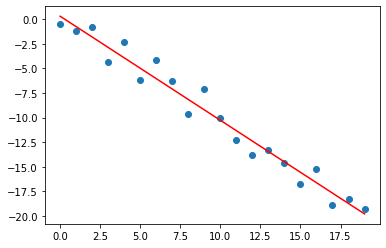

In [60]:
# Метод наименьших квадратов
b1 = y1.std()/x.std()*cor(x, y1)
b0 = y1.mean() - b1*x.mean()
f = lambda x: b0 + b1*x
y = f(x)
plt.scatter(x, y1)
plt.plot(x, y, color='r')
plt.show()


### Регрессионный анализ на данных

In [421]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
df = pd.read_csv('states.csv')
df.head()

,state,metro_res,white,hs_grad,poverty,female_house
0,Alabama,55.4,71.3,79.9,14.6,14.2
1,Alaska,65.6,70.8,90.6,8.3,10.8
2,Arizona,88.2,87.7,83.8,13.3,11.1
3,Arkansas,52.5,81.0,80.9,18.0,12.1
4,California,94.4,77.5,81.1,12.8,12.6


In [422]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
metro_res,51.0,72.249020,15.275894,38.2,60.80,71.6,86.80,100.0
white,51.0,81.719608,13.897223,25.9,76.80,85.4,90.25,97.1
hs_grad,51.0,86.011765,3.725998,77.2,83.30,86.9,88.70,92.1
poverty,51.0,11.349020,3.099185,5.6,9.25,10.6,13.40,18.0
female_house,51.0,11.633333,2.356155,7.8,9.55,11.8,12.65,18.9


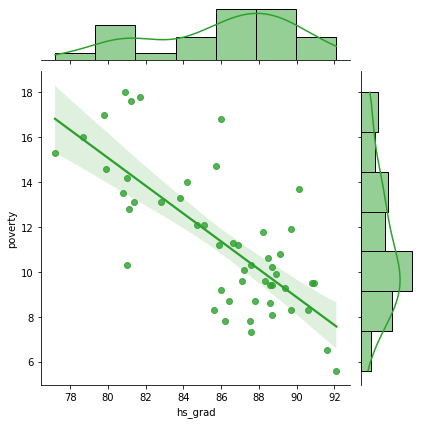

In [423]:
sb.jointplot(data = df, x = 'hs_grad', y = 'poverty', kind = 'reg', color='#2CA02C')

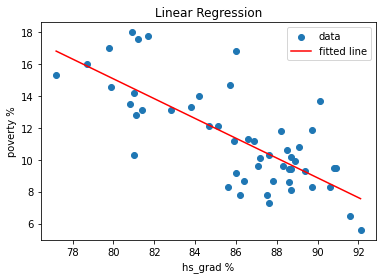

In [424]:
# Строим модель
from scipy.stats import linregress

slope, intercept, r_value, p_value, se = linregress(df['hs_grad'], df['poverty'])

x = np.linspace(df['hs_grad'].min(), df['hs_grad'].max(), num = 51)

reg = lambda x: intercept + slope * x
fig, ax = plt.subplots(1, 1)
ax.set_xlabel('hs_grad %')
ax.set_ylabel('poverty %')
plt.scatter(data = df, x = 'hs_grad', y = 'poverty', label = 'data')
plt.title('Linear Regression')
plt.plot(x, reg(x), color = 'r', label = 'fitted line')
plt.legend()
plt.show()

In [425]:
print(f'''
slope = {slope:.2f}
intercept = {intercept:.2f}
r_value = {r_value:.2f}
R squared = {(r_value ** 2):.2f}
p_value = {p_value:.5f}
se = {se:.3f}
''')


slope = -0.62
intercept = 64.78
r_value = -0.75
R squared = 0.56
p_value = 0.00000
se = 0.079



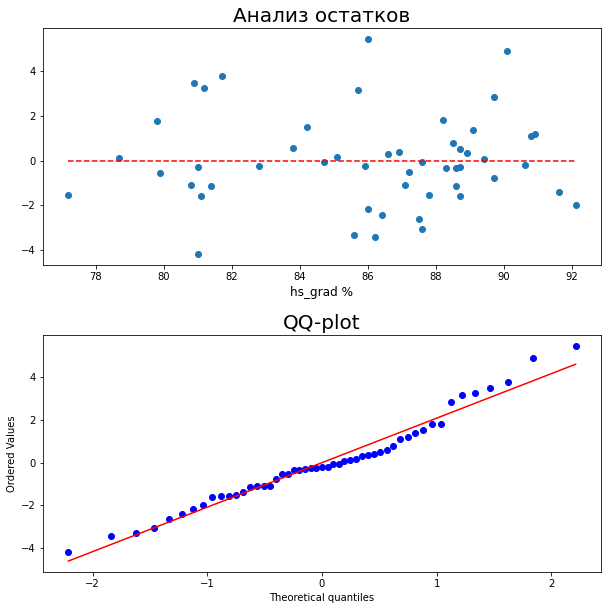

In [426]:
import scipy as sp
fig, (ax1, ax2) = plt.subplots(2,1, figsize = (10, 10))
plt.subplots_adjust(hspace=0.3)
coordinates = (df['hs_grad'].values, df['poverty'].values)
residuals = coordinates[1] - reg(coordinates[0])
ax1.scatter(coordinates[0], residuals)
                                 
func = lambda x: 0*x
ax1.plot(x, func(x), '--', color = 'r')
ax1.set_title('Анализ остатков', fontsize = 20)
ax1.set_xlabel('hs_grad %', fontsize = 12)

sp.stats.probplot(residuals, plot = ax2)
ax2.set_title('QQ-plot', fontsize = 20)
plt.show()


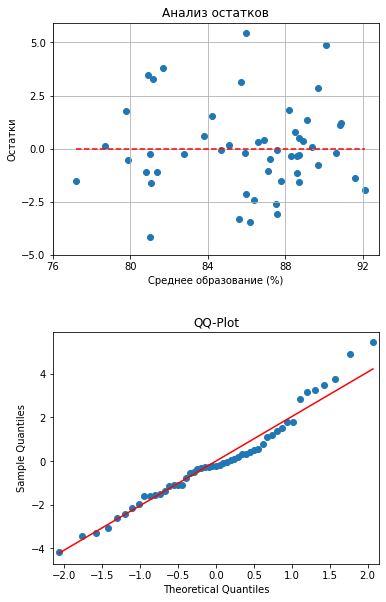

In [427]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import statsmodels.api as sma

# получаем данные и вычисляем коэффициэнты регрессионной модели
data=pd.read_csv('states.csv', sep=',')
intercept, slope = sm.ols(formula="poverty ~ hs_grad", data=data).fit().params
X = data['hs_grad']
Y = data['poverty']

# вычисляем остатки - на сколько Y далека от теоретической модели
residuals = Y - intercept - slope*X
x1=np.linspace(min(X),max(X),len(X))

# создаем графики
fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, figsize=(6, 9))
# scatter plot
ax1.scatter(X,residuals)
ax1.plot(x1,[0]*len(x1),'--r')
# Q-Q plot
sma.qqplot(residuals, line='s', ax = ax2)

ax1.grid()
ax1.set_title('Анализ остатков')
ax1.set_xlabel('Среднее образование (%)')
ax1.set_ylabel('Остатки')
ax1.set_xticks(np.arange(76,93, step=4))
ax1.set_yticks(np.arange(-5,6, step=2.5))

ax2.set_title('QQ-Plot')

fig.tight_layout(pad=3.0)
plt.show()

### Регрессионный анализ с несколькими независимыми переменными

In [1465]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as pgo
import numpy as np
import statsmodels.formula.api as smfa

df = pd.read_csv('data/states.csv')

lm = smfa.ols(formula='poverty ~ white + hs_grad', data = df).fit()
#print(lm.summary())
margin = 2
mesh_size = 1
x_min, x_max = df.white.min() - margin, df.white.max() + margin
y_min, y_max = df.hs_grad.min() - margin, df.hs_grad.max() + margin
z_pred = lambda x, y: lm.params.Intercept + lm.params.white * x  + lm.params.hs_grad * y
x_range = np.arange(x_min, x_max, mesh_size)
y_range = np.arange(y_min, y_max, mesh_size)
z_range = np.array([[z_pred(x, y) for x in x_range] for y in y_range])

df['poverty_pred'] = np.array([poverty >= z_pred(df.white[i], df.hs_grad[i]) for i, poverty in df.poverty.items()])

fig = px.scatter_3d(df, x = 'white', y = 'hs_grad', z = 'poverty', 
                    color='poverty_pred', 
                    color_discrete_sequence=['red', 'green'],
                   title='Зависиость процента белого населения и уровня образования на бедность населения')
fig.update_traces(marker=dict(size=3))
fig.add_traces(pgo.Surface(x = x_range, y = y_range, z = z_range, name = 'prediction', opacity=0.8, colorscale = 'sunset'))
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))

fig.show()

In [1467]:
import pandas as pd
import statsmodels.formula.api as smf

df = pd.read_csv('data/states.csv')
lm = smf.ols(formula = 'poverty ~ metro_res + white + hs_grad + female_house', data = df).fit()

# lm.params

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                poverty   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     20.58
Date:                Tue, 26 Jul 2022   Prob (F-statistic):           8.88e-10
Time:                        12:01:38   Log-Likelihood:                -103.39
No. Observations:                  51   AIC:                             216.8
Df Residuals:                      46   BIC:                             226.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       66.4765     12.590      5.280      0.000      41.134      91.819
metro_res       -0.0563      0.020     -2.881      0.006      -0.096      -0.017
white           -0.0481      0.033     -1.456      0.152      -0.115       0.018
hs_grad         -0.5547      0.105     -5.288      0.000      -0.766      -0.344
female_house     0.0505      0.243      0.208      0.836      -0.439       0.540
==============================================================================
Omnibus:                        3.254   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.197   Jarque-Bera (JB):                3.043
Skew:                           0.585   Prob(JB):                        0.218
Kurtosis:                       2.750   Cond. No.                     6.50e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

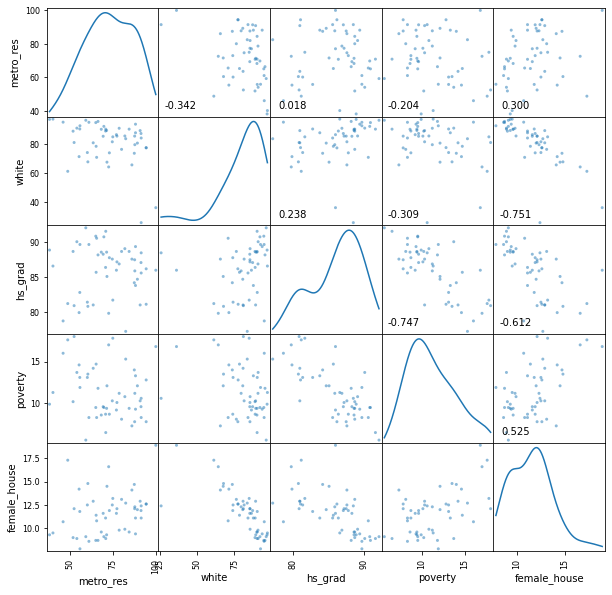

In [1491]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

axes = pd.plotting.scatter_matrix(df,figsize = (10,10), diagonal="kde", grid=True)
data_corr = df.corr().values
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %data_corr[i,j], (0.2, 0.1), xycoords='axes fraction', ha='center', va='center')
plt.show()

In [1498]:
# Найдём такой набор фичей, что R-squared максимальна
features = {'metro_res', 'white', 'hs_grad', 'female_house'}

# Рекурсивно переберём все сочетания переменных
def brute_force(params: set, formula: str, result: set) -> str:
    if not params:
        result.add(formula.lstrip('+ '))
        return 
    else:
        new_params = params.copy()
        for el in params:
            new_params.remove(el)

            brute_force(new_params, formula + ' + ' + el, result)
            brute_force(new_params, formula, result)

res = set()          
brute_force(features, '', res)
res.remove('')

# Теперь посчитаем Adjusted R-Square для каждого сочетания и выведем на экран
for formula in res:
    lm = smf.ols(formula='poverty ~ ' + formula, data=df).fit()
    print(f'{lm.rsquared_adj:.2}', formula)
    
print()
print('Вывод: сочетание "white + metro_res + hs_grad" даёт наилучший результат. Т.к. Adj.R-squared наибольшее и = 0.62')

0.55 hs_grad
0.58 hs_grad + metro_res
0.62 hs_grad + white + metro_res
0.55 hs_grad + female_house + white
0.6 hs_grad + female_house + metro_res
0.26 female_house
0.55 hs_grad + female_house
0.61 hs_grad + female_house + white + metro_res
0.17 white + metro_res
0.56 hs_grad + white
0.26 female_house + white
0.077 white
0.4 female_house + metro_res
0.39 female_house + white + metro_res
0.022 metro_res

Вывод: сочетание "white + metro_res + hs_grad" даёт наилучший результат. Т.к. Adj.R-squared наибольшее и = 0.62


In [1496]:
lm = smf.ols(formula='poverty ~ metro_res + white + hs_grad', data=df).fit()

# print the coefficients
#lm.params

# print a summary of the fitted model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                poverty   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     28.00
Date:                Tue, 26 Jul 2022   Prob (F-statistic):           1.55e-10
Time:                        12:38:46   Log-Likelihood:                -103.41
No. Observations:                  51   AIC:                             214.8
Df Residuals:                      47   BIC:                             222.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     68.7220      6.389     10.756      0.000      55.869      81.575
metro_res     -0.0555      0.019     -2.926      0.005      -0.094      -0.017
white         -0.0533      0.021     -2.483      0.017      -0.097      -0.010
hs_grad       -0.5697      0.075     -7.569      0.000      -0.721      -0.418
==============================================================================
Omnibus:                        3.479   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.176   Jarque-Bera (JB):                3.230
Skew:                           0.607   Prob(JB):                        0.199
Kurtosis:                       2.787   Cond. No.                     3.32e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.32e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

---

[Про выбор наилучшей регрессионной модели](https://www.kaggle.com/code/junkal/selecting-the-best-regression-model/notebook)

---

### Хи квадрат

$$ \chi^2 = \sum_{i=1}^{n} \frac{(O_i-E_i)^2}{E_i} $$,
где $ O_i $ - наблюдаемая частота, $ E_i $ - ожидаемая частота

$ H_0 $ - предполагаем, что распределение частот равномерное

**Задача:**

Эмпирическое распределение частот некоторого номинативного признака с тремя градациями приняло вид
18, 55, 27. Предполагаемое теоретическое распределение — 1 : 2 : 1.

Рассчитайте расстояние хи-квадрат и введите получившееся значение с точностью хотя бы до одной цифры после запятой.

In [371]:
import scipy.stats as st
result = st.chisquare([18, 55, 27], f_exp = [25, 50, 25])

print(result[0])
result

2.62


Power_divergenceResult(statistic=2.62, pvalue=0.26982005638468687)

Критическое значение для $ \chi^2 $ для p < 0.05 равняется 5.9 (df = 2)

Если эксперимент, где всего лишь 2 значения номинативного признака и зная один из них мы можем найти значение другого, то df = 1

Пример: монетка (df = 1), игральный кубик (df = 5)

При этом зная общее число бросков

**Распределение $\chi^2$:**

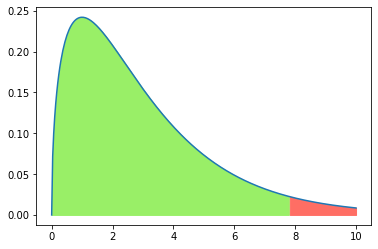

In [518]:
import scipy.stats as sp
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
p = 0.95
df = 3
chi_value = sp.chi2.isf(1-p, df = df)
y = sp.chi2.pdf(x, df = df)
ax.plot(x, y)
x = np.linspace(0, 10, 300)
left_x, right_x = x <= chi_value, x >= chi_value
ax.fill_between(x[left_x], y[left_x], color = '#99EF67')
ax.fill_between(x[right_x], y[right_x], color = '#FF6E64')
plt.show()

**Задача:**

Какая доля наблюдений лежит в диапазоне от 2 до 4 у распределения хи-квадрат с двумя степенями свободы?

In [379]:
print(st.chi2.sf(2, 2) - st.chi2.sf(4, 2))

0.23254415793482974


<img src = 'img/chi-squared1.png' align = midlle width = 400>
<img src = 'img/chi-squared2.png' align = middle width = 400>

Рассчитаем p-уровень значимости для примера с игральной костью. Значения наблюдаемых частот (от единички до шестерки):

10, 10, 10, 5, 10, 15

Проверьте нулевую гипотезу о том, что эмпирическое распределение частот не отличается от равномерного. В поле для ответа введите получившийся p-уровень значимости. 

In [380]:
# Observed | Expected frequencies
st.chisquare([10, 10, 10, 5, 10, 15], f_exp = [10, 10, 10, 10, 10, 10])

Power_divergenceResult(statistic=5.0, pvalue=0.4158801869955079)

**Задача:**

Проверьте гипотезу о том, что в ГС нет никаких различий в предпочтениях трех партий
<img src = "img/plot2.png">

In [237]:
st.chisquare([10, 30, 50], f_exp = [30, 30, 30])

Power_divergenceResult(statistic=26.666666666666668, pvalue=1.61959679231261e-06)

**Задача:**


В группе 15 юношей и 9 девушек, проверьте гипотезу о том, что распределение частот девушек и юношей не отличается от равномерного в генеральной совокупности студентов

In [381]:
st.chisquare([15, 9], f_exp = [12, 12])

Power_divergenceResult(statistic=1.5, pvalue=0.22067136191984324)

**Задача:**

В 2013 году Эдвард Сноуден передал СМИ секретную информацию АНБ, касающуюся слежки американских спецслужб за информационными коммуникациями между гражданами. Однако ﻿его поступок вызвал неоднозначную реакцию в обществе. Исследовательский центр USA TODAY провел опрос 1500 граждан США с целью выяснить, воспринимают ли они поступок Сноудена как положительный или отрицательный. 53% опрошенных респондентов оценили разоблачение положительно.

При помощи теста хи-квадрат проверьте нулевую гипотезу о том, что в генеральной совокупности распределение отношения к поступку Сноудена является равномерным, то есть 50 на 50.

In [239]:
st.chisquare([795, 705], f_exp = [750, 750])

Power_divergenceResult(statistic=5.4, pvalue=0.02013675155034633)

### Анализ таблиц сопряженности

#### Для расчета вручную:
<img src = "img/slide1.png" width = 650>

**Задача:**

В таблице представлены результаты эксперимента, направленного на проверку гипотезы о взаимосвязи двух номинативных переменных с двумя градациями. Рассчитайте ожидаемые частоты для проверки нулевой гипотезы о независимости двух переменных X и Y.

<img src = "img/table1.png">

Напишите максимальное значение из четырех ожидаемых частот.

In [391]:
observed = [[10, 6], [5, 15]]

# return values: chi2 | p-value | dof (degrees of freedom) | expected values
print(st.chi2_contingency(observed)[3].max())

st.chi2_contingency(observed)

11.666666666666666


(3.715714285714286,
 0.053902557169387154,
 1,
 array([[ 6.66666667,  9.33333333],
        [ 8.33333333, 11.66666667]]))

Формула для расчета ожидаемых частот в таблице сопряженности:
$$ f_{i, j} = \frac{f_i \cdot f_j}{N} $$

$f_i$ - число наблюдений в $i$-ой строке

$f_j$ - число наблюдений в $j$-ом столбце

$N$ - общее количество наблюдений в таблице

<img src = "img/slide2.png" width = 650>

### Поправка Йетса

<img src = "img/slide3.png" width = 650>

df при расчете $\chi^2$ равняется: df = (n - 1)(m - 1)

**Задача:**

Перед знаком стоп некоторые водители останавливаются полностью, другие лишь сбавляют скорость, но некоторые не останавливаются вообще. Важнейший вопрос, есть ли взаимосвязь между полом и стилем вождения автомобиля!  Ниже представлена таблица сопряженности данных исследования, посвященного этому вопросу.

<img src = "img/table2.png">

In [394]:
import pandas as pd
df = pd.DataFrame(np.array([(20, 15), (11, 12), (7, 9)]), index = ['Тормозят', 'Притормаживают', 'Не тормозят'], columns = ['Мужчины', 'Женщины'])

chi_tuple = st.chi2_contingency(df, correction = False)
chi_tuple
#st.chisquare(df.to_numpy().ravel(), f_exp = chi_tuple[3].ravel())

(0.9544070774762996,
 0.6205162173513055,
 2,
 array([[17.97297297, 17.02702703],
        [11.81081081, 11.18918919],
        [ 8.21621622,  7.78378378]]))

<img src = "img/table3.png" width = 650>

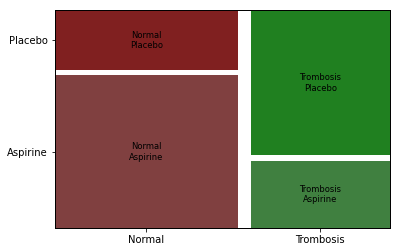

In [419]:
from statsmodels.graphics.mosaicplot import mosaic
props = lambda key: {'color': '#FFD254' if 'Trombosis' in key else '#AB2314'}
pill_data = {('Normal', 'Aspirine'): 18, 
             ('Normal', 'Placebo'): 7,
             ('Trombosis', 'Aspirine'): 6,
             ('Trombosis', 'Placebo'): 13
            }

my_plot = mosaic(pill_data, gap = 0.04) #, properties = props)

- размер прямоугольников  соответствует количеству наблюдений.
- цвет прямоугольников - величине значимости отклонения ожидаемых и наблюдаемых частот в этой ячейке.
- если значения стандартизированных остатков больше 3х, можно считать, что в этой ячейке зафиксированы значимые отклонения.

*Без понятия как вывести легенду*

### Точный критерий Фишера

Используется при маленьких выборках, но сейчас, так как есть компьютеры может использоваться и на больших выборках

$$ \frac{C^a_{a+b} \cdot C^c_{c+d}}{C^{a + c}_n} $$

<img src = "img/slide4.png">

In [432]:
odds_ratio, p_value = st.fisher_exact([[1, 3], [3, 1]])

print(p_value)

0.48571428571428565


<img src = "img/slide5.png">

### Логистическая регрессия

In [762]:
import warnings

warnings.filterwarnings('ignore')
#warnings.filterwarnings('always')
#warnings.simplefilter('always')

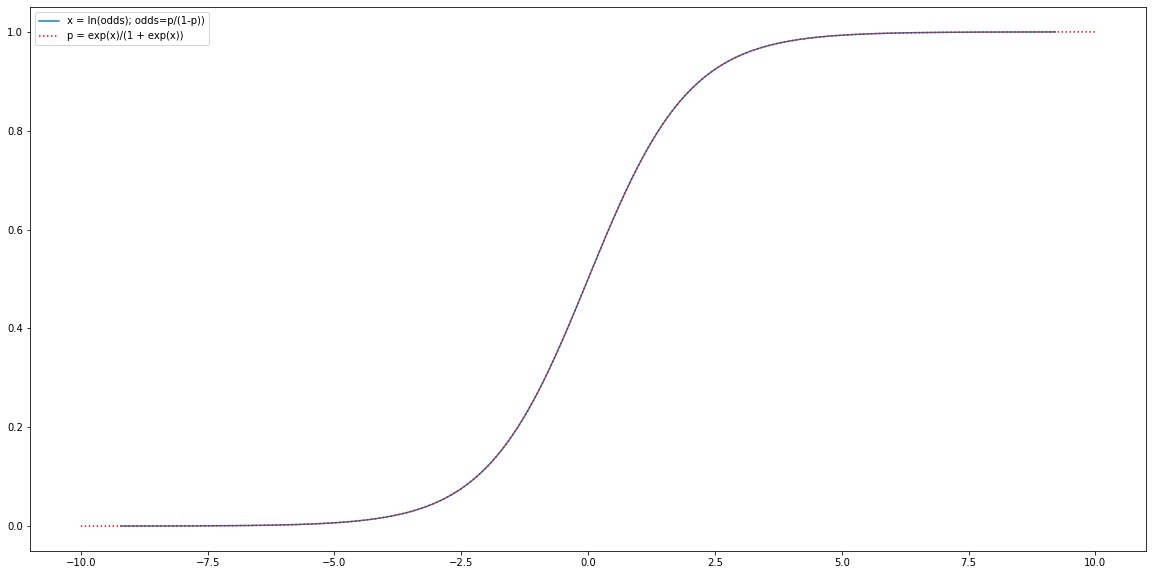

In [760]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.subplots(figsize = (20, 10))

def odds(p):
    return p / (1 - p)

def logit(x):
    return np.exp(x) / (1 + np.exp(x))

p1 = np.linspace(0, 1, 10000)
x1 = np.log(odds(p1))
x2 = np.linspace(-10, 10, 10000)
p2 = logit(x2)

plt.plot(x1, p1, label='x = ln(odds); odds=p/(1-p))')
plt.plot(x2, p2, 'r:', label='p = exp(x)/(1 + exp(x))')
plt.legend()
plt.show()

In [763]:
import warnings
warnings.filterwarnings('always')

**Задача:**

Предположим, мы подбросили монетку 100 раз, и 70 раз выпал орел. Чему равняется натуральный логарифм шансов выпадения решки?

In [439]:
np.log(30/70)

-0.8472978603872037

**Задача:**

Предположим, что мы получили логарифм шансов выпадения решки, равный -1. Тогда вероятность выпадения решки равняется:

<img src = "img/written_records1.jpeg" width = 300>

In [440]:
p = 1/(1+np.e)
print(p)

0.2689414213699951


**Задача:**

<img src = "img/table4.png">

Рассчитайте логарифм шанса, того что случайно выбранный человек из нашей выборки окажется биологом.

In [301]:
np.log(24/17)

0.3448404862917296

**Задача:**

С помощью логистической регрессии без предикторов мы захотели узнать, правда ли, что сдавая Анатолию Дмитриевичу, легче провалить экзамен, чем сдать. В нашей выборке было 50 студентов. Часть из них сдала экзамен (положительный исход), а часть - нет (отрицательный исход). Свободный член нашей регрессии оказался равен -0.8472979. Сколько человек всё-таки сдало экзамен?

In [519]:
a = np.exp(-0.8472979)
p = a/(1 + a)
round(p * 50)

15

### Модель без предикторов. Intercept only model

In [683]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np

df = pd.read_csv('data/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [696]:
df = df.dropna(subset = 'Age')

nSurvived = df.groupby(['Survived'])['Survived'].count()

In [782]:
y = df.Survived
# фиктиный предиктор (чтобы сделать модель без предиктора)
x = np.zeros((y.size, 1))

model = LogisticRegression()
clf = model.fit(x, y)

# Шансы полученные из модели и вычисленные вручную
odds1 = np.exp(np.ndarray.item(clf.intercept_))
odds2 = nSurvived[1] / nSurvived[0]
p = odds1 / (odds1 + 1)
print(f'''
model odds: {odds1:.3f}
manual odds: {odds2:.3f}
probability of Survival: {p:.3f}
''')


model odds: 0.684
manual odds: 0.684
probability of Survival: 0.406



---

*На заметку:* https://stackoverflow.com/questions/70143564/logisticregression-from-sk-learn-and-smf-logit-from-statsmodels-formula-api-re

---

In [1433]:
import statsmodels.formula.api as smf
df = pd.read_csv('data/titanic.csv')
df = df.dropna(subset = 'Age')

# Стилистика R (По мне самый простой и удобный способ)
model = smf.logit(formula = 'Survived ~ 1', data = df)
res_rstyle = model.fit()

res_rstyle.summary()

Optimization terminated successfully.
         Current function value: 0.675431
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  714
Model:                          Logit   Df Residuals:                      713
Method:                           MLE   Df Model:                            0
Date:                Mon, 25 Jul 2022   Pseudo R-squ.:               9.013e-11
Time:                        23:23:55   Log-Likelihood:                -482.26
converged:                       True   LL-Null:                       -482.26
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3799      0.076     -4.985      0.000      -0.529      -0.230
==============================================================================
"""

### Модель с одним номинативным предиктором

In [1434]:
nSexSurvived = pd.crosstab(df.Survived, df.Sex)
nSexSurvived

Sex,female,male
Survived,,
0,64,360
1,197,93


In [1435]:
y = df.Survived
# Перевод в номинативный тип
x, _ = pd.factorize(df.Sex)

# Инвертируем, чтобы в Intercept был логарифм отношения шансов полож исхода
# для женщин
# А при коэффициенте - логарифм отношения шансов полож исхода для мужчин 
x = 1 - x.reshape((-1, 1))

# penalty - это регулиризация (штраф, который нам сейчас не нужен)
model = LogisticRegression(penalty='none')
clf = model.fit(x, y)
print(f'''
intercept: {np.ndarray.item(clf.intercept_):.3f}
SexMale: {np.ndarray.item(clf.coef_):.3f}
''')
# SexMale: log(odds_M/odds_F) < 0
odds_f = nSexSurvived['female'][1]/nSexSurvived['female'][0]
odds_m = nSexSurvived['male'][1]/nSexSurvived['male'][0]
odds_fm = odds_f/odds_m
odds_mf = odds_m/odds_f
print(f'''
log(odds_f) = {np.log(odds_f):.4f}
log(odds_m) = {np.log(odds_m):.4f}
log(odds_fm) = {np.log(odds_fm):.4f}
log(odds_mf) = {np.log(odds_mf):.4f}
''')


intercept: 1.124
SexMale: -2.478


log(odds_f) = 1.1243
log(odds_m) = -1.3535
log(odds_fm) = 2.4778
log(odds_mf) = -2.4778



#### Используем StatsModels вместо SkLearn

In [1078]:
import pandas as pd
import statsmodels.api as sm

df = pd.read_csv('data/titanic.csv', dtype = category_columns)
df = df[df.Age.notnull()] # <=> df = df.dropna(subset = 'Age')

y = df.loc[:,'Survived'].cat.codes
x = sm.add_constant(df.loc[:,'Sex'].cat.codes) # Тут как-то запутанно,
# в примере пишут + к этой строчке
# x = sm.add_constant(df.loc[:,'Pclass'].cat.codes)
# (Это если мы хотим провести анализ с двумя номинативными предикторами)
# но это не особо работает, в отличие от примера ниже

# Для перевода из female, male: 0 и 1 соответственно
# легче всего использовать cat.codes,
# а не как в предыдущем примере factorize, а потом reshape, хотя здесь
# reshape может и не пригодиться, наверное
glm_binom = sm.GLM(y, x, family = sm.families.Binomial())
res = glm_binom.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  714
Model:                            GLM   Df Residuals:                      712
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -375.35
Date:                Mon, 25 Jul 2022   Deviance:                       750.70
Time:                        14:33:58   Pearson chi2:                     714.
No. Iterations:                     4   Pseudo R-squ. (CS):             0.2588
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1243      0.144      7.814      0.000       0.842       1.406
0             -2.4778      0.185    -13.392      0.000      -2.840      -2.115
==============================================================================
"""

In [1077]:
import statsmodels.formula.api as smf
df = pd.read_csv('data/titanic.csv')
df = df.dropna(subset = 'Age')

# Стилистика R (По мне самый простой и удобный способ)
# Буковкой C мы указываем, что это категориальные данные, так еще проще
# чем в предыдущем примере
model = smf.logit(formula = 'Survived ~ C(Sex)', data = df)
res_rstyle = model.fit()

res_rstyle.summary()

Optimization terminated successfully.
         Current function value: 0.525700
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  714
Model:                          Logit   Df Residuals:                      712
Method:                           MLE   Df Model:                            1
Date:                Mon, 25 Jul 2022   Pseudo R-squ.:                  0.2217
Time:                        14:32:47   Log-Likelihood:                -375.35
converged:                       True   LL-Null:                       -482.26
Covariance Type:            nonrobust   LLR p-value:                 2.020e-48
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1243      0.144      7.814      0.000       0.842       1.406
C(Sex)[T.male]    -2.4778      0.185    -13.392      0.000      -2.840      -2.115
==================================================================================
"""

### Модель с двумя номинативными предикторами

In [1107]:
import statsmodels.formula.api as smf

# Приводим данные к категориальным (которые возможно)
df = pd.read_csv('data/titanic.csv', dtype = category_columns)
df = df.dropna(subset = 'Age')

# Стилистика R
# В этом случае почему-то коэффициенты меняют знак, это связано с категоризацией
# данных (dtype = category_columns)
glm_binom_rstyle = smf.glm(formula="Survived ~ Sex*Pclass", data=df, family=sm.families.Binomial())
res_rstyle = glm_binom_rstyle.fit()

res_rstyle.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Generalized Linear Model Regression Results                        
==========================================================================================
Dep. Variable:     ['Survived[0]', 'Survived[1]']   No. Observations:                  714
Model:                                        GLM   Df Residuals:                      708
Model Family:                            Binomial   Df Model:                            5
Link Function:                              Logit   Scale:                          1.0000
Method:                                      IRLS   Log-Likelihood:                -321.14
Date:                            Mon, 25 Jul 2022   Deviance:                       642.28
Time:                                    17:03:48   Pearson chi2:                     714.
No. Iterations:                                 6   Pseudo R-squ. (CS):             0.3632
Covariance Type:                        nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -3.3081      0.588     -5.628      0.000      -4.460      -2.156
Sex[T.male]                 3.7301      0.622      5.997      0.000       2.511       4.949
Pclass[T.2]                 0.8804      0.726      1.213      0.225      -0.542       2.303
Pclass[T.3]                 3.4653      0.620      5.585      0.000       2.249       4.681
Sex[T.male]:Pclass[T.2]     0.4204      0.804      0.523      0.601      -1.156       1.997
Sex[T.male]:Pclass[T.3]    -2.1542      0.676     -3.185      0.001      -3.480      -0.829
===========================================================================================
"""

In [1106]:
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import aic
df = pd.read_csv('data/titanic.csv')
df = df.dropna(subset = 'Age')

# Стилистика R (По мне самый простой и удобный способ)
# Буковкой C мы указываем, что это категориальные данные, так еще проще
# чем в предыдущем примере + коэффициенты имеют правильный знак
model = smf.logit(formula = 'Survived ~ C(Sex) * C(Pclass)', data = df)
res_rstyle = model.fit()

res_rstyle.summary()

Optimization terminated successfully.
         Current function value: 0.449772
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  714
Model:                          Logit   Df Residuals:                      708
Method:                           MLE   Df Model:                            5
Date:                Mon, 25 Jul 2022   Pseudo R-squ.:                  0.3341
Time:                        17:03:23   Log-Likelihood:                -321.14
converged:                       True   LL-Null:                       -482.26
Covariance Type:            nonrobust   LLR p-value:                 1.650e-67
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         3.3081      0.588      5.628      0.000       2.156       4.460
C(Sex)[T.male]                   -3.7301      0.622     -5.997      0.000      -4.949      -2.511
C(Pclass)[T.2]                   -0.8804      0.726     -1.213      0.225      -2.303       0.542
C(Pclass)[T.3]                   -3.4653      0.620     -5.585      0.000      -4.681      -2.249
C(Sex)[T.male]:C(Pclass)[T.2]    -0.4204      0.804     -0.523      0.601      -1.997       1.156
C(Sex)[T.male]:C(Pclass)[T.3]     2.1542      0.676      3.185      0.001       0.829       3.480
=================================================================================================
"""

**Задача:**

Рассчитайте значение экспоненты коэффициентов модели, в поле для ответа введите сумму получившихся чисел.

<img src = 'img/table5.png'>

In [310]:
np.exp(1.1243)+np.exp(-2.4778)

3.161989115096665

**Задача:**

Во сколько раз шансы выжить для женщин превышают шансы выжить для мужчин?

<img src = 'img/table5.png'>

In [330]:
df = pd.DataFrame({'Estimate': [1.1243, -2.4778],
                   'SE': [0.1439, 0.1850],
                   'z value': [7.81, -13.39],
                   'Pr(>|z|)': [0.0000, 0.0000]},
                   index = ['(Intercept)', 'SexMale'])

exp_female_est = np.exp(df['Estimate'][0])
p_female = exp_female_est/(1 + exp_female_est)
odds_female_survive =  p_female / (1 - p_female)

exp_male_est = np.exp(df['Estimate'][0] + df['Estimate'][1])
p_male = exp_male_est/(1 + exp_male_est)
odds_male_survive =  p_male / (1 - p_male)

odds_female_survive / odds_male_survive


11.915022512809621

### Взаимодействие номинативных предикторов

In [333]:
effect_exp = np.exp(-1.15 + 0.8 + 2.13 - 0.17)

effect_exp/(1 + effect_exp) 

0.8334113864245404

In [358]:
odds_female_1st_class = np.exp(3.3081)
odds_female_2d_class = np.exp(3.3081 - 0.8804)

odds_male_2nd_class = np.exp(3.3081 - 3.7301 - 0.8804 - 0.4204)
odds_male_3d_class = np.exp(3.3081 - 3.7301 - 3.4653 + 2.1542)

# odds_female_1st_class / (odds_male_2nd_class + odds_male_3d_class) # ??

prob_of_surv_fem_1st_cl = odds_female_1st_class / (1 + odds_female_1st_class)
prob_of_surv_fem_1st_cl

odds_male_1st_class = np.exp(3.3081 - 3.7301)

print(odds_female_1st_class / odds_male_1st_class)

41.68327628324819


### Непараметрические методы

U-критерий Манна-Уитни аналог t-теста

Манна-Уитни требует одинаковых распределений двух выборок(не обязательно нормальных)

In [1114]:
from scipy.stats import mannwhitneyu
males = [19, 22, 16, 29, 24]
females = [20, 11, 17, 12]

U1, p = mannwhitneyu(males, females, method="exact")
print(U1, p)

17.0 0.1111111111111111


<img src = "img/note2.png">

<img src = img/note1.png>

---
Аналогом Дисперсионного анализа является Критерий Краскела-Уоллиса

In [1116]:
from scipy import stats
x = [1, 3, 5, 7, 9]
y = [2, 4, 6, 8, 10]
stats.kruskal(x, y)

KruskalResult(statistic=0.2727272727272734, pvalue=0.6015081344405895)

In [1117]:
x = [1, 1, 1]
y = [2, 2, 2]
z = [2, 2]
stats.kruskal(x, y, z)

KruskalResult(statistic=7.0, pvalue=0.0301973834223185)

<img src = "img/note3.png">

---

[Критерий Краскела-Уоллиса (из комментариев, сам не читал)](https://baguzin.ru/wp/rangovyj-kriterij-kruskala-uollisa/)

---

### Кластерный анализ методом k-средних

<img src = "img/note4.png">

**Задача:**

Рассмотрим пример данных, где каждое наблюдение характеризуется двумя переменными X и Y. Рассчитайте координаты центроида наблюдений, изображенных на графике. В поле для ответа введите координаты получившейся точки.

<img src = "img/graph1.jpeg">

In [1124]:
x = np.mean([-3, 1, 2, 3, 5, 6, 7])
y = np.mean([1, 2, 3, 4, 6, 8, 11])

x, y

(3.0, 5.0)

---

Интересная статья: [Диаграмма Вороного](https://ru.wikipedia.org/wiki/%D0%94%D0%B8%D0%B0%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D0%B0_%D0%92%D0%BE%D1%80%D0%BE%D0%BD%D0%BE%D0%B3%D0%BE)

Для визуализации k-means можно воспользоваться [сайтом](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/)

---

#### Алгоритм k-means (k-средних):

- Случайно выбираем исходные позиции центроидов

Повторяем, пока есть изменения:
- Для каждого наблюдения (точки) определяем, к какому центроиду он ближе всего
- Видим, что принадлежность некоторых точек изменилась
- Обновляем принадлежность точек
- Обновляем позиции центроидов

---

<style>
.leftimg 
{
  
}
</style>

<img src = "img/kmeans.gif"  width = 250 style = "float: left; margin: 10px;">

### Про удачную сходимость k-means
Чтобы увеличить шансы того, чтобы k-means сходился удачно, можно раскидывать центроиды на большое расстояние друг от друга.

Причем повторив много раз данный алгоритм мы увеличиваем шансы того, что мы не застряли на локальном минимуме, и k-means сошелся удачно.

*Если при повторных запусках алгоритма k-means на одних и тех же данных с одним и тем же количеством центроидов (k) всё время получаются разные результаты, то есть смысл изменить количество центроидов или это может означать, что в данных нет выраженной структуры*

k-means не всегда удачно сходится, иногда алгоритм попадает в локальный минимум 

### Как выбрать оптимальное количество центроидов

<img src = "img/note5.png">

Если добавление еще одного кластера в данные значительно понижает общую сумму квадратов, то это означает, что в увеличении числа кластеров есть смысл

---

Если общая внутригрупповая сумма квадратов уменьшается довольно плавно, то скорее всего нет никакой явной структуры кластеров наших данных:
<img src = "img/graph2.png">

В качестве оптимального количества кластеров можно использовать точку перегиба и $\pm 1$ значение от нее
<img src = "img/graph3.png">

---

**Задача:**

Вернемся к уже знакомым нам наблюдениям:
<img src = "img/graph1.jpeg">
Предположим, это один из кластеров в наших данных, тогда чему будет равняться внутрикластерная сумма квадратов?

In [1127]:
x = np.mean([-3, 1, 2, 3, 5, 6, 7])
y = np.mean([1, 2, 3, 4, 6, 8, 11])

points = np.array([[-3, 3], [1, 4], [2, 6], [3, 8], [5, 2], [6, 11], [7, 1]])

mean = np.array([x, y])

ISS = np.sum((points - mean) ** 2)

ISS

146.0

[[3. 5.]]
146.0


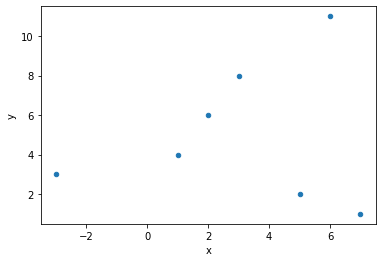

In [1146]:
# Второй вариант решения задачи
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

points = np.array([[-3, 3], [1, 4], [2, 6], [3, 8], [5, 2], [6, 11], [7, 1]])

# Обучим модель KMeans на нашем массиве с одним кластером
kmeans = KMeans(n_clusters = 1).fit(points)

# Выведем координаты центроида данного кластера
print(kmeans.cluster_centers_)

# Выведем сумму квадратов расстояний точек от центроида = аттрибут модели kmeans
print(kmeans.inertia_)

df = pd.DataFrame(points, columns = ['x', 'y'])
df.plot(kind = 'scatter', x = 'x', y = 'y')
plt.show()

#### Примеры алгоритма k-средних

In [1160]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
# Уже отсортированные по категориям виды Ириса
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


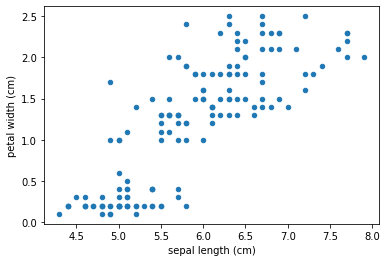

In [1153]:
df.plot(kind = 'scatter', x = 'sepal length (cm)', y = 'petal width (cm)')
plt.show()

In [1185]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3)

data = df.loc[:, ['sepal length (cm)', 'petal width (cm)']]

model = kmeans.fit(data)

data['cluster'] = model.labels_
data.head()

,sepal length (cm),petal width (cm),cluster
0,5.1,0.2,1
1,4.9,0.2,1
2,4.7,0.2,1
3,4.6,0.2,1
4,5.0,0.2,1


*Предсказанные значения:*

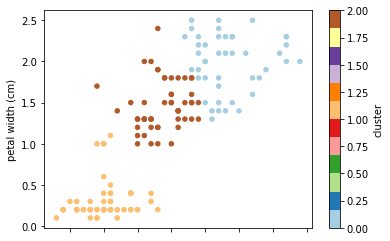

In [1186]:
data.plot(kind = 'scatter', x='sepal length (cm)', y='petal width (cm)', c = 'cluster', colormap = 'Paired')
plt.show()

*Правильные значения:*

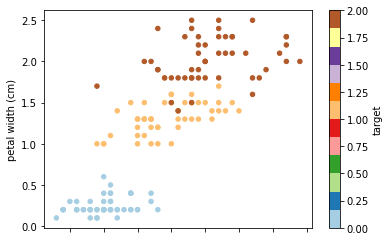

In [1188]:
df.plot(kind='scatter', x='sepal length (cm)', y='petal width (cm)', c='target', colormap='Paired')
plt.show()

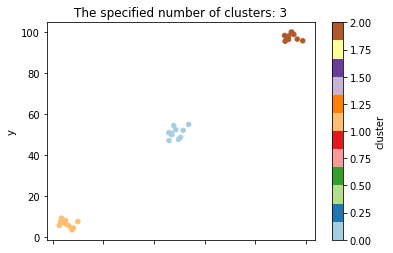

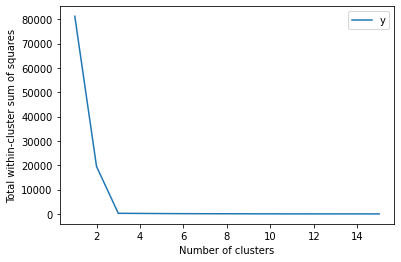

In [1458]:
import numpy as np
df = pd.DataFrame(
    np.concatenate(
        (
            np.random.uniform([1, 1], [10, 10], (10, 2)),
            np.random.uniform([45, 45], [55, 55], (10, 2)),
            np.random.uniform([90, 90], [100, 100], (10, 2)),
        )
    ),
    columns=["x", "y"],
)
a = np.array([])
for i in range(1, 16):
    kmeans = KMeans(n_clusters = i)
    model = kmeans.fit(df)
    df['cluster'] = model.labels_
    a = np.append(a, kmeans.inertia_)

graph = pd.DataFrame(a, columns = ['y'])
graph['index'] = np.array(range(1, 16)).reshape(-1, 1)
graph = graph.set_index('index')

kmeans = KMeans(n_clusters = 3)
model = kmeans.fit(df)
df['cluster'] = model.labels_

# Ось x не отображается так как в документации написано,
# что при kind = "scatter" эта ось не отображается
df.plot(kind="scatter", x="x", y="y", c="cluster",colormap="Paired", title = 'The specified number of clusters: 3')
graph.plot(xlabel = 'Number of clusters', ylabel = 'Total within-cluster sum of squares')

plt.show()

### Иерархическая кластеризация

#### Метод ближайшего соседа

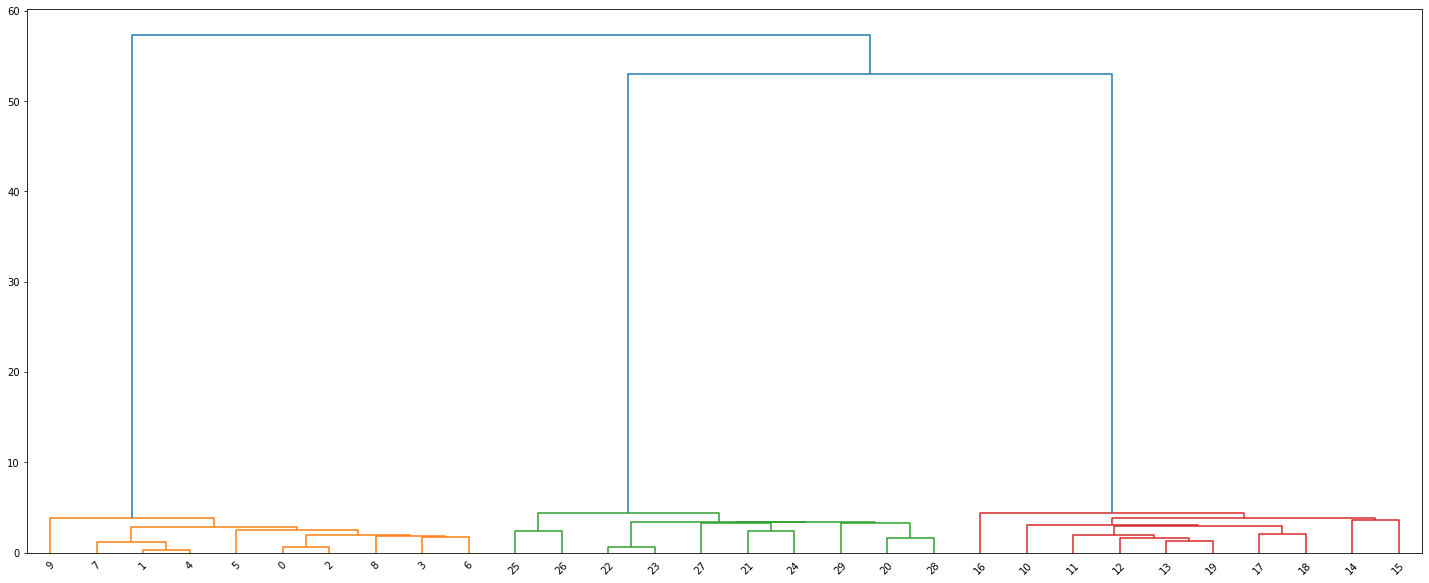

In [1461]:
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

df = pd.DataFrame(
    np.concatenate(
        (
            np.random.uniform([1, 1], [10, 10], (10, 2)),
            np.random.uniform([45, 45], [55, 55], (10, 2)),
            np.random.uniform([90, 90], [100, 100], (10, 2)),
        )
    ),
    columns=["x", "y"],
)

Z = linkage(df, 'single')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
plt.show()

### Заметки:

---
Интересные ссылки:

[Visualizing DBSCAN Clustering](https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/)

[Visualizing Lasso Polytope Geometry](https://www.naftaliharris.com/blog/lasso-polytope-geometry/)

---
<img src = "img/info.png">
<img src = "img/ml.png">
<img src = "img/tests_diagram.jpg">